In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '../data/serenelli2017/serenelli2017_low-mass.csv'
master = pd.read_csv(data_path)

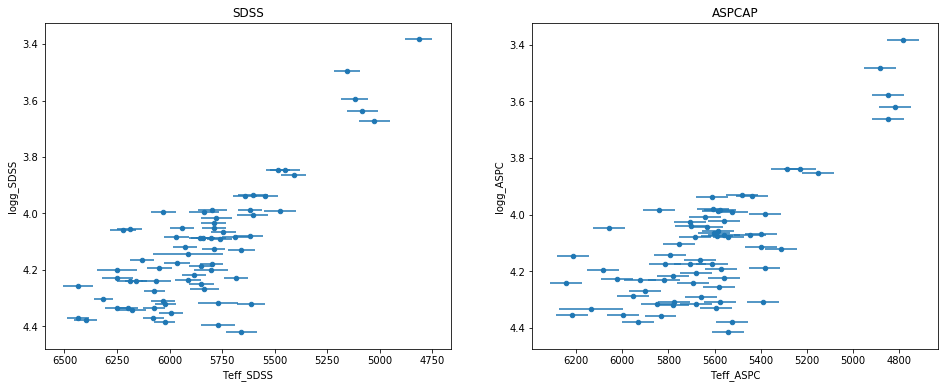

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
master.plot(ax=ax[0], kind='scatter', x='Teff_SDSS', y='logg_SDSS',
               xerr='eTeff_SDSS'  # , yerr='eDnu'
           )
master.plot(ax=ax[1], kind='scatter', x='Teff_ASPC', y='logg_ASPC',
                 xerr='eTeff_ASPC'  # , yerr='eDnu'
           )

ax[0].set_title('SDSS')
ax[1].set_title('ASPCAP')

for a in ax:
    a.invert_xaxis()
    a.invert_yaxis()

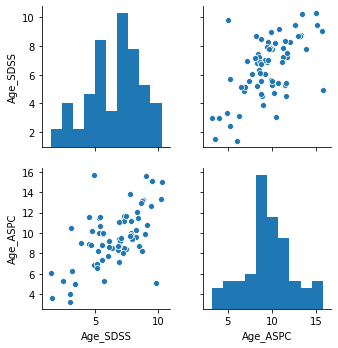

In [19]:
sns.pairplot(master, vars=['Age_SDSS', 'Age_ASPC'])

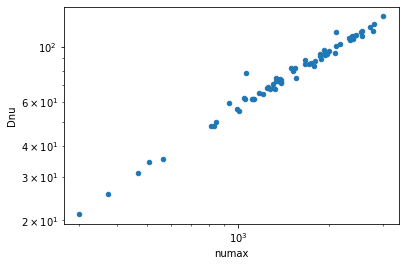

In [20]:
ax = master.plot(kind='scatter', x='numax', y='Dnu')
ax.set_xscale('log')
ax.set_yscale('log')

In [21]:
master['eDnu_over_Dnu'] = master.eDnu / master.Dnu

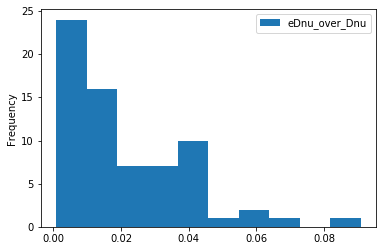

In [22]:
master.plot(kind='hist', y='eDnu_over_Dnu')

In [23]:
master[master['eDnu_over_Dnu'] < 0.01].head()

,KIC,numax,enumax,Dnu,eDnu,Length,HBR,Teff_SDSS,eTeff_SDSS,[M/H]_SDSS,...,sylogg_ASPC,rho_ASPC,+erho_ASPC,-erho_ASPC,syrho_ASPC,Age_ASPC,+eAge_ASPC,-eAge_ASPC,syAge_ASPC,eDnu_over_Dnu
4,3427720,2726.381,56.767,120.045,0.120,963.8,1.125,6023.0,51.0,-0.037,...,0.006,0.78880,0.001847,-0.002331,0.006548,3.980,1.171,-1.132,1.400,0.001000
6,3656476,1932.400,23.744,93.305,0.079,783.3,1.371,5684.0,56.0,0.233,...,0.006,0.47100,0.000699,-0.000842,0.005604,9.792,1.548,-1.397,1.993,0.000847
8,4446300,844.081,29.487,50.025,0.469,24.9,1.973,5410.0,60.0,-0.101,...,0.008,0.13470,0.002484,-0.002411,0.001839,11.180,2.031,-1.650,2.461,0.009375
9,4450844,1358.900,20.580,72.653,0.198,189.4,1.373,5968.0,59.0,-0.280,...,0.009,0.28260,0.001545,-0.001395,0.004988,11.700,1.352,-1.225,1.995,0.002725
12,4915148,567.165,8.847,35.351,0.281,29.5,5.683,5026.0,75.0,0.095,...,0.006,0.06905,0.001024,-0.001035,0.000440,12.020,2.274,-2.235,2.260,0.007949


Text(0.5, 1.0, 'ASPCAP')

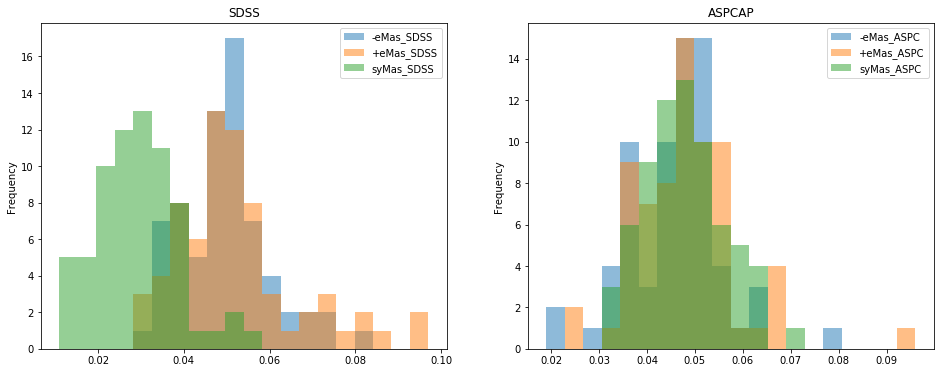

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
abs(master).plot(ax=ax[0], kind='hist', y=['-eMas_SDSS', '+eMas_SDSS', 'syMas_SDSS'], bins=20, alpha=0.5)
abs(master).plot(ax=ax[1], kind='hist', y=['-eMas_ASPC', '+eMas_ASPC', 'syMas_ASPC'], bins=20, alpha=0.5)

ax[0].set_title('SDSS')
ax[1].set_title('ASPCAP')

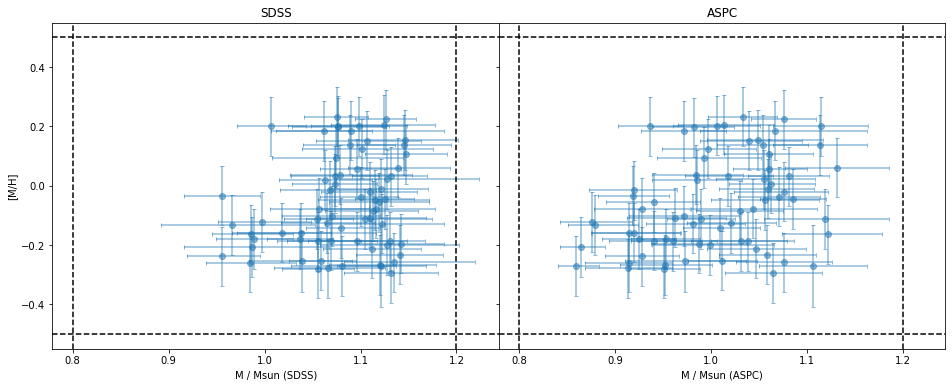

In [25]:
survey = 'SDSS'

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True,
                       gridspec_kw=dict(wspace=0.0))

for i, survey in enumerate(['SDSS', 'ASPC']):
    # master.plot(ax=ax, kind='scatter', x=f'Mass_{survey}', y=f'[M/H]_{survey}')

    ax[i].errorbar(*master[[f'Mass_{survey}', f'[M/H]_{survey}']].to_numpy().T,
                xerr=abs(master[[f'-eMas_{survey}', f'+eMas_{survey}']]).to_numpy().T,
                yerr=abs(master[f'e[M/H]_{survey}']).to_numpy(),
                fmt='o', capsize=2, alpha=0.5)

    ax[i].axhline(y=0.5, color='k', linestyle='--')
    ax[i].axhline(y=-0.5, color='k', linestyle='--')
    ax[i].axvline(x=0.8, color='k', linestyle='--')
    ax[i].axvline(x=1.2, color='k', linestyle='--')
    
    ax[i].set_xlabel(f'M / Msun ({survey})')
    ax[i].set_title(f'{survey}')

ax[0].set_ylabel(f'[M/H]');

Overplot grid1 on logg teff with sample to see.

Extend grid1 and only consider MS stars to save time (cut in log_g and teff to just get MS stars) then calc for subgiants in future. About 1 week to extend the grid.

* M 0.8 - 1.2
* M/H -0.5 - 0.5
* Y 0.24 - 0.32
* alpha 1.6 - 2.3 (2.1)
* diffusion TRUE

further discussion about convective envelope overshooting

APOKASK \[M/H\] surface metallicity 

log(Zobs/Xobs) = log(Z/X)sun,obs + \[M/H\]obs

log(Zini/Xini) = log(Z/X)sun,obs + \[M/H\]ini

Tanda: Suggested test density of stellar grid needed for the neural network. E.g. keep increasing the mass step and see at what point the neural network breaks down.

Cross-match with Gaia-Kepler to get parallax (for corrections etc. - use https://iopscience.iop.org/article/10.3847/1538-4357/aada83/pdf - Consider Green 2019 dust maps if there are issues with Green 2018 used in this paper)

For MLT alpha initial guesses if you want to constrain, read Magic, Z. Stagger-grid (2015) and Trampedach, R. II. Calibrating mixing-length (2014). This will allow you to understand how mixing length changes on the logg - Teff chart. Ideally models would vary mixing length with time but this is a current limitation of the models. There are people who query a hydrodynamical mixing length table during model evolution and adjust alpha accordingly.

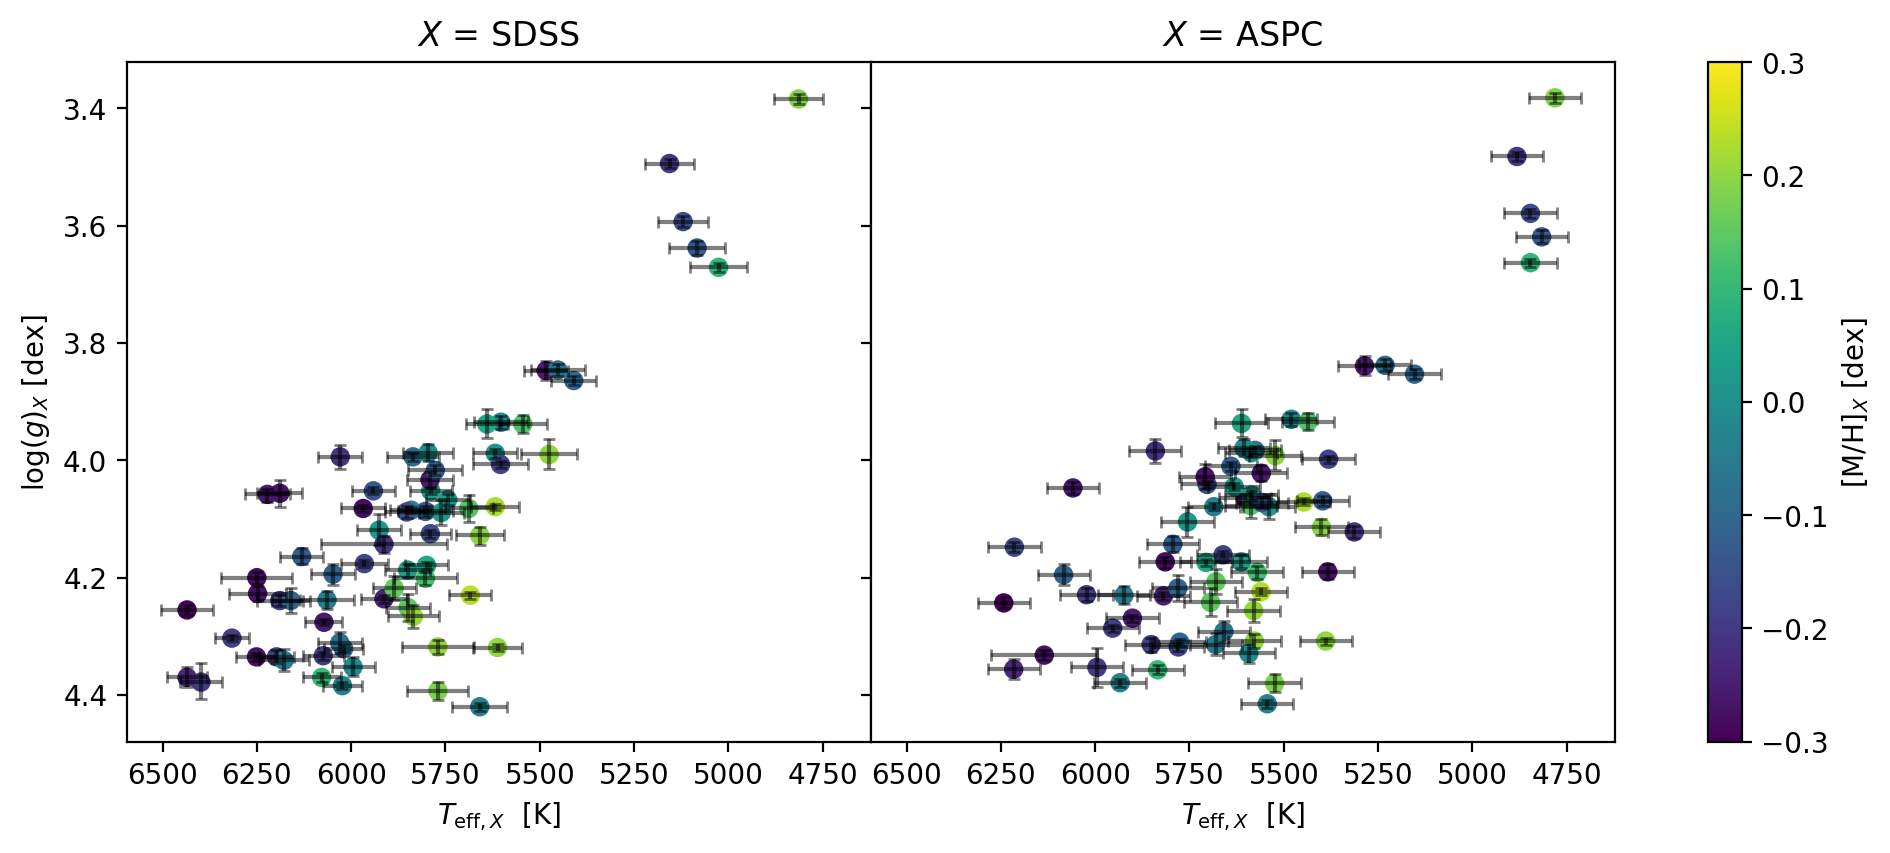

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5), dpi=200., sharex=True, sharey=True,
                       gridspec_kw=dict(wspace=0.))

for i, survey in enumerate(['SDSS', 'ASPC']):
    # master.plot(ax=ax, kind='scatter', x=f'Mass_{survey}', y=f'[M/H]_{survey}')
    color = master[f'[M/H]_{survey}'].to_numpy().T

    ax[i].errorbar(*master[[f'Teff_{survey}', f'logg_{survey}']].to_numpy().T,
                yerr=abs(master[[f'-elogg_{survey}', f'+elogg_{survey}']]).to_numpy().T,
                xerr=abs(master[f'eTeff_{survey}']).to_numpy(),
                fmt='none', color='k', capsize=2, alpha=0.5)
    s = ax[i].scatter(*master[[f'Teff_{survey}', f'logg_{survey}']].to_numpy().T,
                      c=color, cmap='viridis', vmin=-0.3, vmax=0.3)

#     ax[i].axhline(y=0.5, color='k', linestyle='--')
#     ax[i].axhline(y=-0.5, color='k', linestyle='--')
#     ax[i].axvline(x=0.8, color='k', linestyle='--')
#     ax[i].axvline(x=1.2, color='k', linestyle='--')
    
    ax[i].set_xlabel(r'$T_{\mathrm{eff}, X}$  [K]')
    ax[i].set_title(r'$X$ = ' + f'{survey}')


ax[0].invert_xaxis()
ax[0].invert_yaxis()
ax[0].set_ylabel(r'$\log(g)_X$ [dex]')

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.8, 0.15, 0.02, 0.7])
# fig.colorbar(s, cax=cbar_ax)
fig.colorbar(s, ax=ax.ravel().tolist(), label=f'[M/H]$_X$ [dex]')